# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_iris, load_breast_cancer, load_diabetes, make_classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


Decision trees are hierarchical, tree-like structures used for:
        • Classification: Predicting categorical outcomes
        • Regression: Predicting continuous values
        
        Structure:
        • Root Node: Starting point with entire dataset
        • Internal Nodes: Decision points with splitting criteria
        • Leaf Nodes: Final predictions/outcomes
        • Branches: Paths connecting nodes based on conditions

        Algorithm Steps:
        • Start with root node containing all data
        • Find best feature and threshold to split data
        • Create child nodes based on split
        • Repeat recursively until stopping criteria met
        • Assign predictions to leaf nodes
        
        Key Concepts:
        • Splitting Criteria: How to choose best split
        • Impurity Measures: Quantify node homogeneity
        • Pruning: Prevent overfitting
        • Tree Depth: Control complexity

Classification Impurity Measures:
        
        a) Gini Impurity:
           Gini = 1 - Σ(p_i²) where p_i is probability of class i
           • Range: [0, 1-1/k] where k is number of classes
           • 0 = pure node (all samples same class)
           • Higher values = more impure
        
        b) Entropy:
           Entropy = -Σ(p_i * log2(p_i))
           • Range: [0, log2(k)]
           • 0 = pure node
           • log2(k) = maximum impurity
        
        c) Information Gain:
           IG = Parent_Impurity - Σ(|S_v|/|S| * Child_v_Impurity)
           • Measures reduction in impurity after split
           • Higher IG = better split
        
        Regression Impurity Measures:
        
        a) Mean Squared Error (MSE):
           MSE = (1/n) * Σ(y_i - y_mean)²
           • Measures variance within node
        
        b) Mean Absolute Error (MAE):
           MAE = (1/n) * Σ|y_i - y_median|
           • Less sensitive to outliers

Best Split Selection:
        
        1. For each feature:
           - Sort unique values
           - Consider each value as potential threshold
           - Calculate impurity for resulting split
        
        2. Choose split that maximizes:
           - Information Gain (classification)
           - Variance reduction (regression)
        
        3. Stopping Criteria:
           - Maximum tree depth reached
           - Minimum samples per node
           - Minimum impurity decrease
           - All samples in node belong to same class

DISADVANTAGES OF DECISION TREES

        ✗ Prone to overfitting (high variance)
        ✗ Unstable (small changes in data → different trees)
        ✗ Can create biased trees if classes are imbalanced
        ✗ May not generalize well to unseen data
        ✗ Limited to axis-parallel splits
        ✗ Can be computationally expensive for large datasets

        Pre-pruning (Early Stopping):
        • max_depth: Maximum tree depth
        • min_samples_split: Minimum samples to split node
        • min_samples_leaf: Minimum samples in leaf node
        • min_impurity_decrease: Minimum impurity reduction
        
        Post-pruning (Cost Complexity Pruning):
        • Remove subtrees that don't improve performance
        • Balance tree complexity vs. accuracy
        • Use validation set to determine optimal pruning

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"\nDataset Info:")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)




Dataset Info:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Shape: (150, 4)
Class distribution: [50 50 50]


In [4]:
# Train decision tree
dt_classifier = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt_classifier.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
# Predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Cross-validation scores: {cv_scores}")
print(f"CV Mean ± Std: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    



Model Performance:
Accuracy: 0.9333
Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
CV Mean ± Std: 0.9600 ± 0.0249



Feature Importance:
             Feature  Importance
2  petal length (cm)    0.541766
3   petal width (cm)    0.458234
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


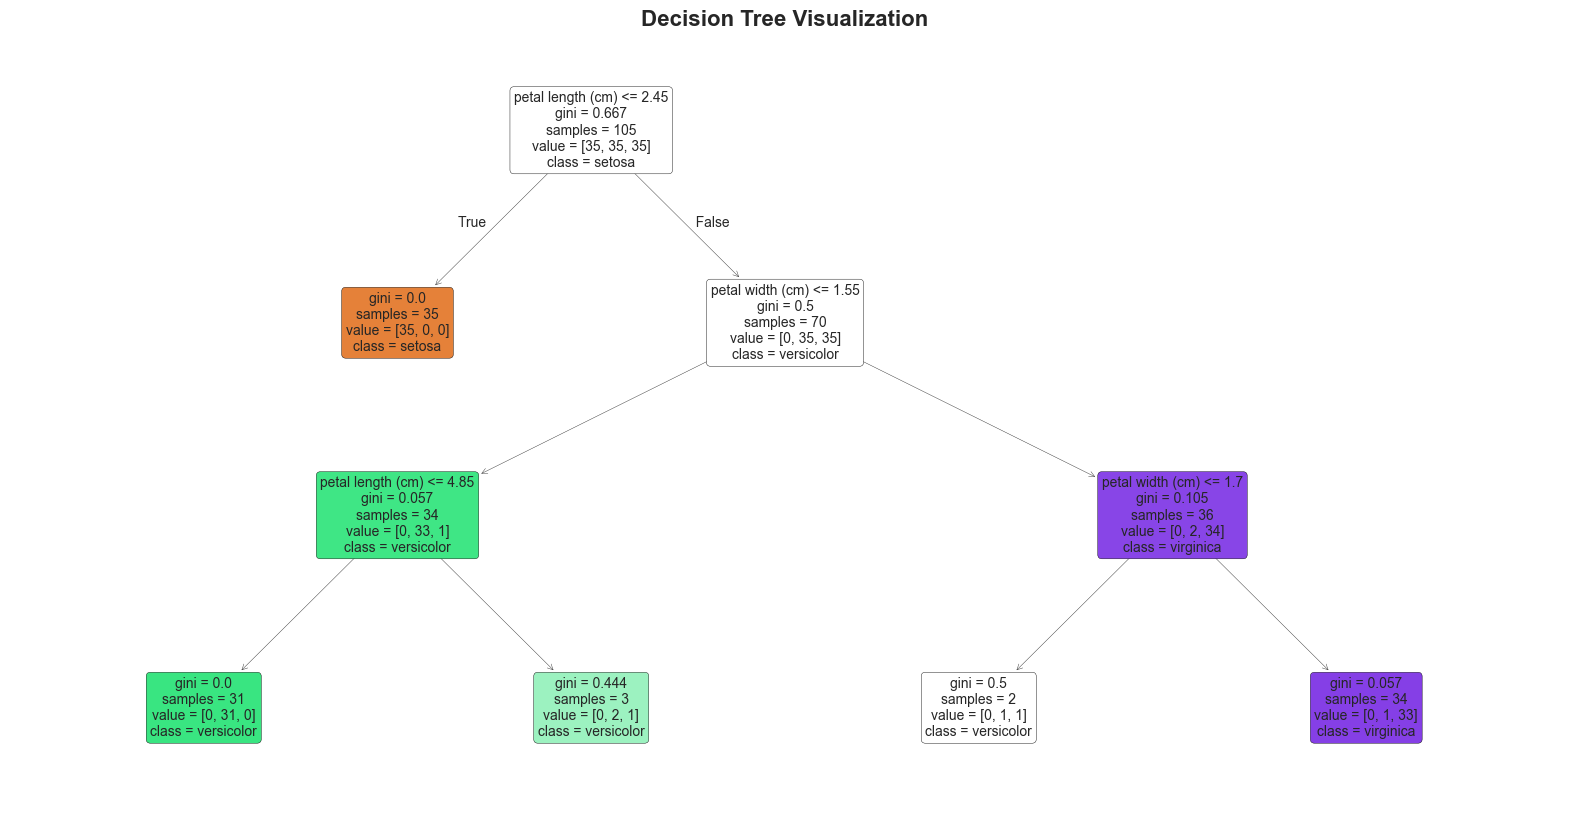

In [6]:
# Feature importance
feature_importance = dt_classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nFeature Importance:")
print(importance_df)

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
            feature_names=feature_names,
            class_names=target_names,
            filled=True,
            rounded=True,
            fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.show()



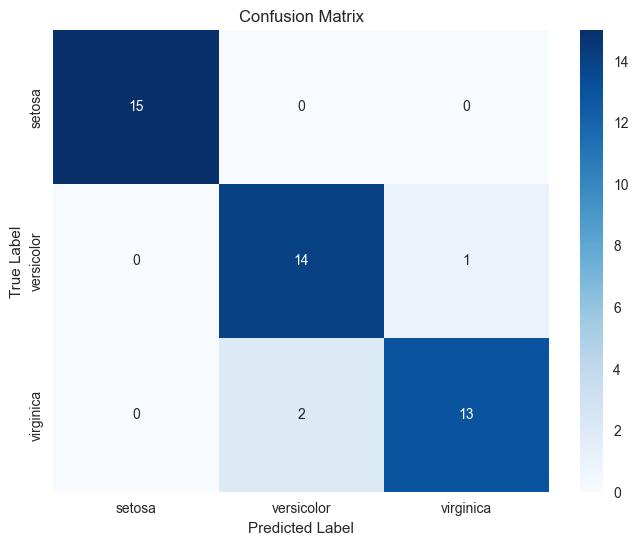

In [7]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [8]:
# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Store results for comparison
classification_results = {
    'accuracy': accuracy,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std()
}


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

